In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

# 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis

In [3]:
df = pd.read_csv('Car_Crash.csv')

In [4]:
df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [5]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# drop the id column as it is useless for the model
df = df.drop('caseid', axis=1)

In [7]:
df.tail()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0
11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0
11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0
11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0


In [8]:
df.shape

(11217, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [10]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [11]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


## Null check

In [12]:
df.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
dtype: int64

In [13]:
df['injSeverity'].fillna(int(df['injSeverity'].mean()), inplace=True)

In [14]:
df.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

## check for duplicates in data

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 2


In [16]:
df.drop_duplicates(keep=False,inplace=True)

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### unique values for categorical variables

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

DVCAT :  5
1-9km/h     282
55+         809
40-54      1344
25-39      3366
10-24      5412
Name: dvcat, dtype: int64


SURVIVED :  2
Not_Survived     1180
survived        10033
Name: Survived, dtype: int64


AIRBAG :  2
none      4153
airbag    7060
Name: airbag, dtype: int64


SEATBELT :  2
none      3368
belted    7845
Name: seatbelt, dtype: int64


SEX :  2
f    5167
m    6046
Name: sex, dtype: int64


ABCAT :  3
nodeploy    2697
unavail     4153
deploy      4363
Name: abcat, dtype: int64


OCCROLE :  2
pass      2431
driver    8782
Name: occRole, dtype: int64




In [19]:
df.deploy.value_counts(1)

0    0.610898
1    0.389102
Name: deploy, dtype: float64

In [20]:
df.frontal.value_counts(1)

1    0.644074
0    0.355926
Name: frontal, dtype: float64

In [21]:
df['deploy'] = pd.Categorical(df.deploy)
df.dtypes

dvcat            object
weight          float64
Survived         object
airbag           object
seatbelt         object
frontal           int64
sex              object
ageOFocc          int64
yearacc           int64
yearVeh         float64
abcat            object
occRole          object
deploy         category
injSeverity     float64
dtype: object

In [22]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,injSeverity
count,11213.000000,11213.000000,11213.000000,11213.000000,11213.000000,11213.000000
mean,431.550397,0.644074,37.435120,2001.102916,1994.175689,1.820030
std,1406.432733,0.478814,18.191376,1.056858,5.658383,1.375426
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000
25%,28.407000,0.000000,22.000000,2001.000000,1991.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,5.000000


## Univariate / Bivariate analysis

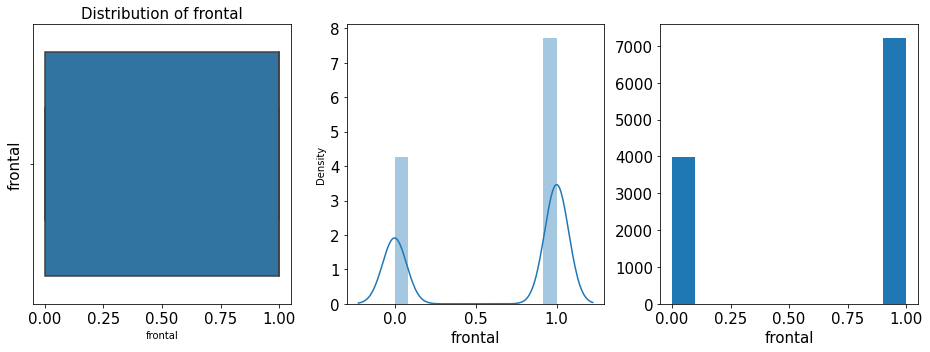

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='frontal',data=df,orient='v',ax=ax1)
ax1.set_ylabel('frontal', fontsize=15)
ax1.set_title('Distribution of frontal', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['frontal'],ax=ax2)
ax2.set_xlabel('frontal', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['frontal'])
ax3.set_xlabel('frontal', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

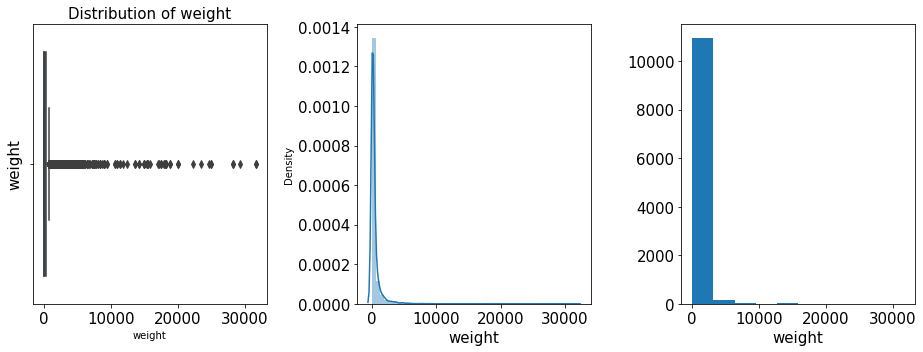

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='weight',data=df,orient='v',ax=ax1)
ax1.set_ylabel('weight', fontsize=15)
ax1.set_title('Distribution of weight', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['weight'],ax=ax2)
ax2.set_xlabel('weight', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['weight'])
ax3.set_xlabel('weight', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

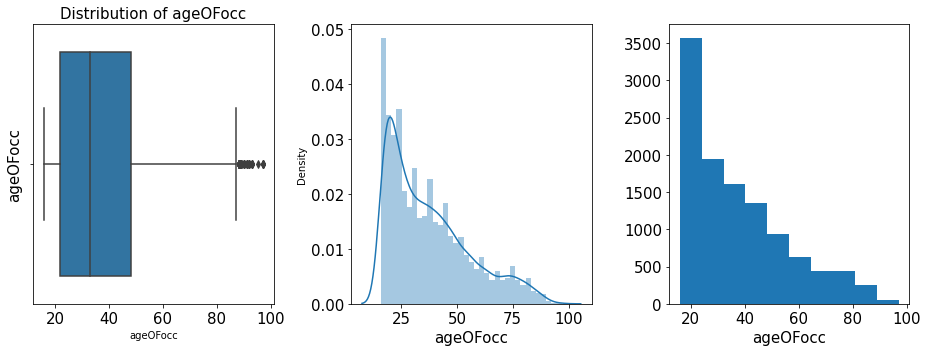

In [25]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ageOFocc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('ageOFocc', fontsize=15)
ax1.set_title('Distribution of ageOFocc', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['ageOFocc'],ax=ax2)
ax2.set_xlabel('ageOFocc', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['ageOFocc'])
ax3.set_xlabel('ageOFocc', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

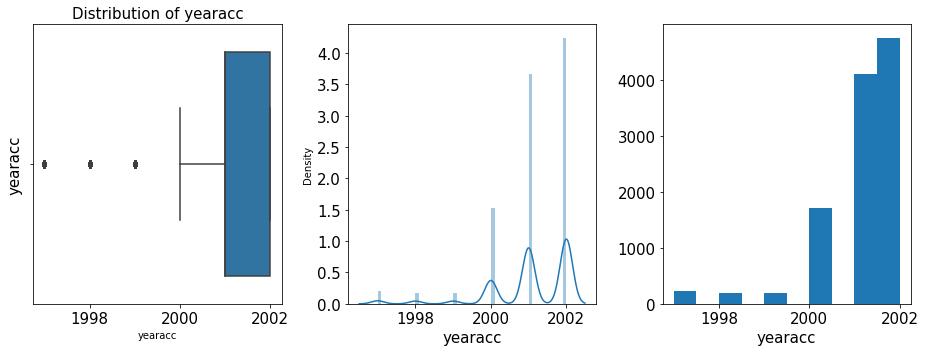

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='yearacc',data=df,orient='v',ax=ax1)
ax1.set_ylabel('yearacc', fontsize=15)
ax1.set_title('Distribution of yearacc', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['yearacc'],ax=ax2)
ax2.set_xlabel('yearacc', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['yearacc'])
ax3.set_xlabel('yearacc', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

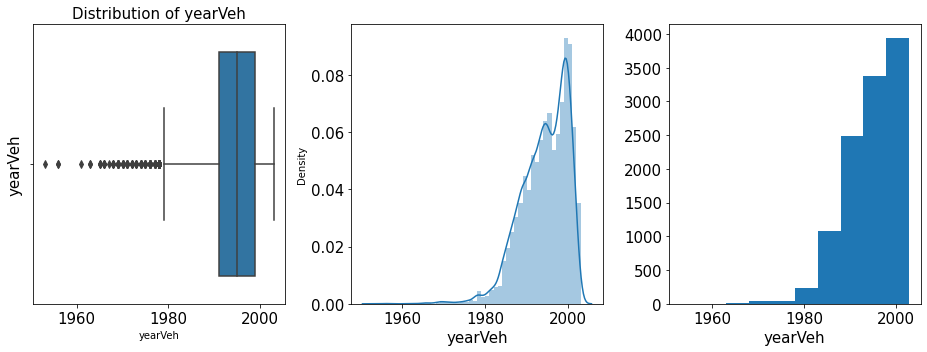

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='yearVeh',data=df,orient='v',ax=ax1)
ax1.set_ylabel('yearVeh', fontsize=15)
ax1.set_title('Distribution of yearVeh', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['yearVeh'],ax=ax2)
ax2.set_xlabel('yearVeh', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['yearVeh'])
ax3.set_xlabel('yearVeh', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

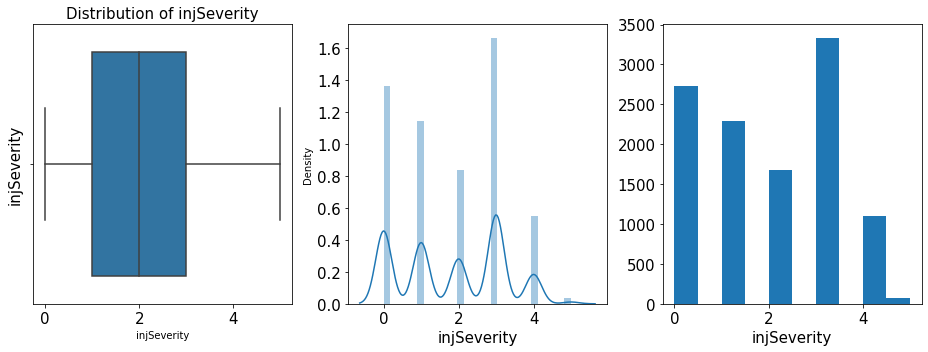

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='injSeverity',data=df,orient='v',ax=ax1)
ax1.set_ylabel('injSeverity', fontsize=15)
ax1.set_title('Distribution of injSeverity', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['injSeverity'],ax=ax2)
ax2.set_xlabel('injSeverity', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['injSeverity'])
ax3.set_xlabel('injSeverity', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [29]:
df.skew()

weight         11.113602
frontal        -0.601902
ageOFocc        0.910855
yearacc        -1.671343
yearVeh        -1.026670
injSeverity     0.046120
dtype: float64

## Categorical Variables

<AxesSubplot:xlabel='dvcat', ylabel='count'>

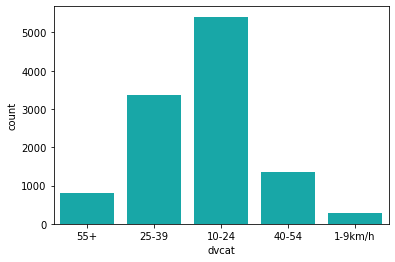

In [30]:
sns.countplot(x="dvcat", data=df, color="c")

<AxesSubplot:xlabel='Survived', ylabel='count'>

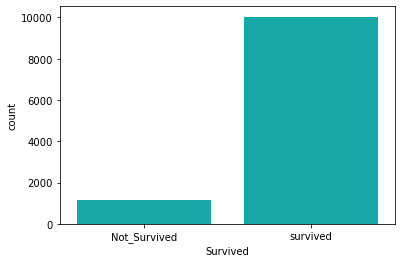

In [31]:
sns.countplot(x="Survived", data=df, color="c")

<AxesSubplot:xlabel='airbag', ylabel='count'>

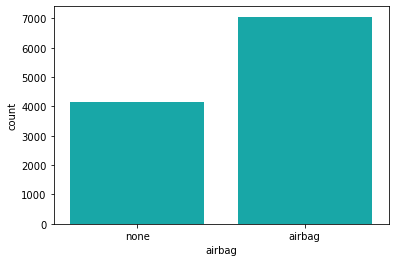

In [32]:
sns.countplot(x="airbag", data=df, color="c")

<AxesSubplot:xlabel='seatbelt', ylabel='count'>

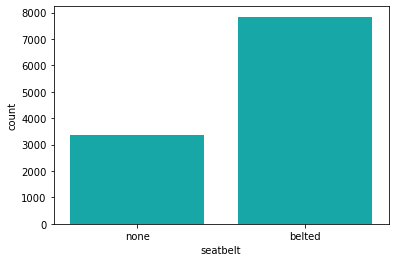

In [33]:
sns.countplot(x="seatbelt", data=df, color="c")

<AxesSubplot:xlabel='sex', ylabel='count'>

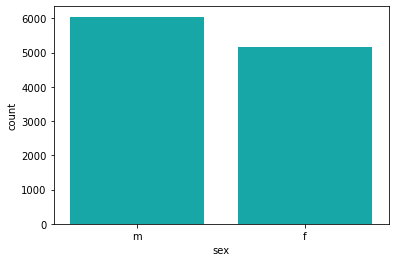

In [34]:
sns.countplot(x="sex", data=df, color="c")

<AxesSubplot:xlabel='abcat', ylabel='count'>

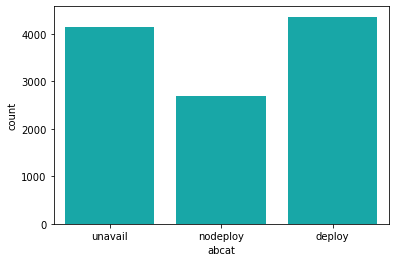

In [35]:
sns.countplot(x="abcat", data=df, color="c")

<AxesSubplot:xlabel='occRole', ylabel='count'>

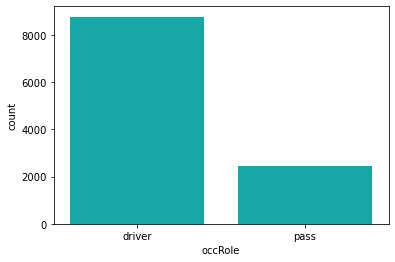

In [36]:
sns.countplot(x="occRole", data=df, color="c")

<AxesSubplot:xlabel='deploy', ylabel='count'>

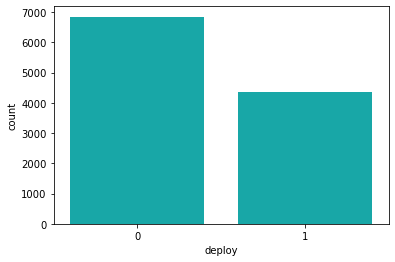

In [37]:
sns.countplot(x="deploy", data=df, color="c")

## Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

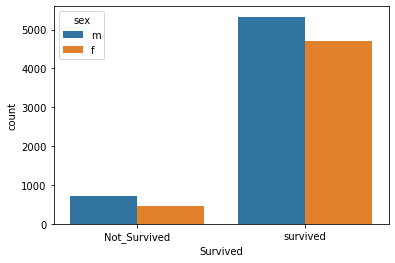

In [38]:
sns.countplot(df["Survived"],hue=df["sex"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

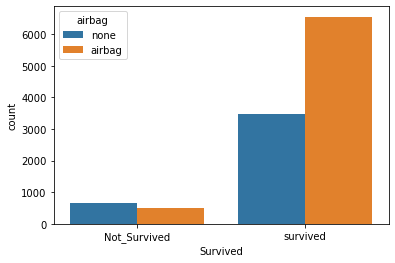

In [39]:
sns.countplot(df["Survived"],hue=df["airbag"]) 

<AxesSubplot:xlabel='airbag', ylabel='count'>

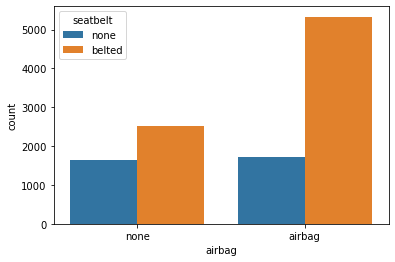

In [40]:
sns.countplot(df["airbag"],hue=df["seatbelt"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

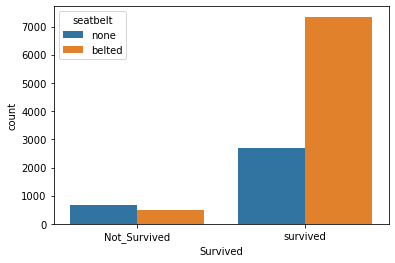

In [41]:
sns.countplot(df["Survived"],hue=df["seatbelt"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

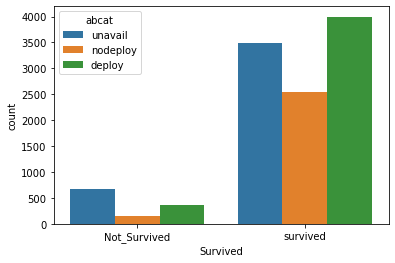

In [42]:
sns.countplot(df["Survived"],hue=df["abcat"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

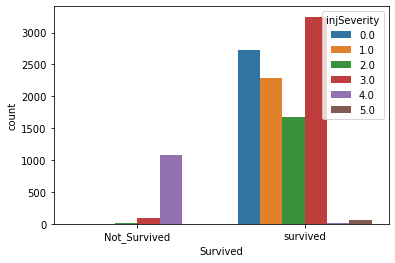

In [43]:
sns.countplot(df["Survived"],hue=df["injSeverity"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

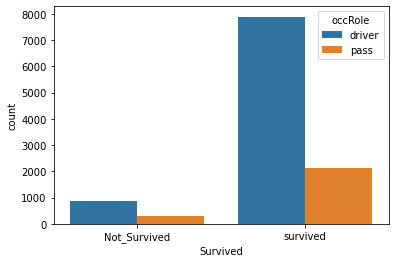

In [43]:
sns.countplot(df["Survived"],hue=df["occRole"]) 

<AxesSubplot:xlabel='occRole', ylabel='count'>

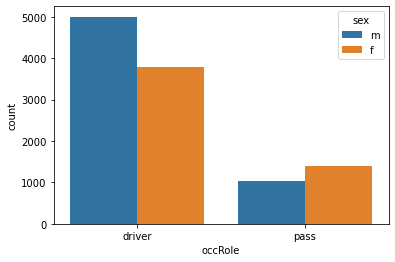

In [44]:
sns.countplot(df["occRole"],hue=df["sex"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

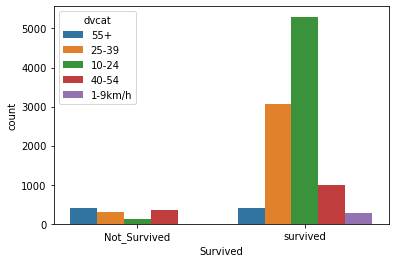

In [45]:
sns.countplot(df["Survived"],hue=df["dvcat"]) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

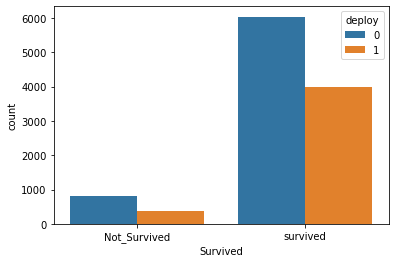

In [46]:
sns.countplot(df["Survived"],hue=df["deploy"]) 

<AxesSubplot:xlabel='dvcat', ylabel='count'>

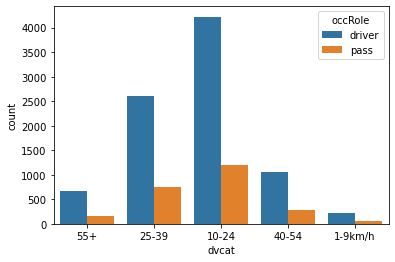

In [47]:
sns.countplot(df["dvcat"],hue=df["occRole"]) 

<AxesSubplot:xlabel='abcat', ylabel='count'>

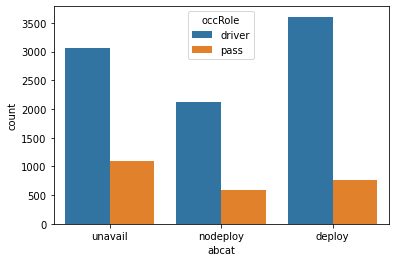

In [48]:
sns.countplot(df["abcat"],hue=df["occRole"]) 

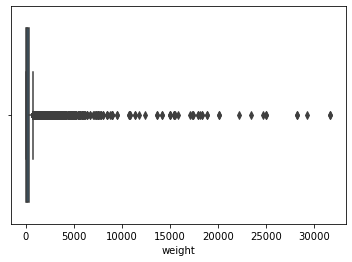

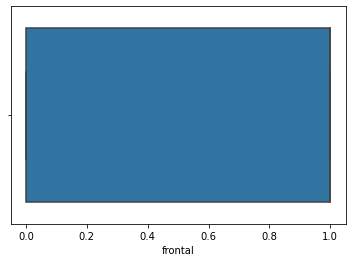

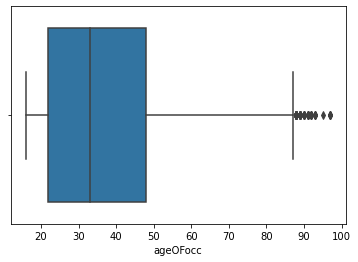

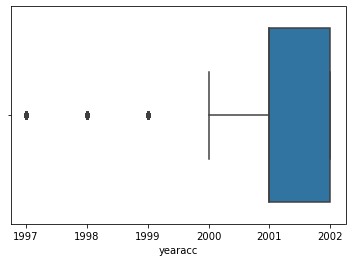

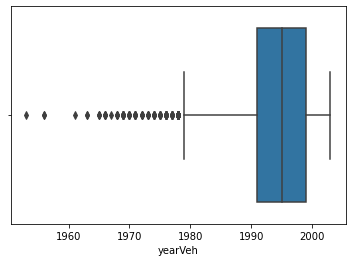

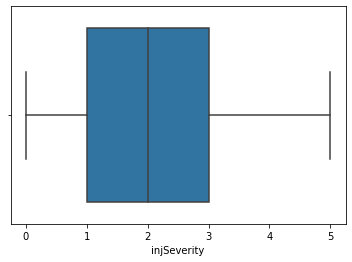

In [49]:
cols = ['weight','frontal','ageOFocc','yearacc','yearVeh','injSeverity']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

## Multivariate Analysis

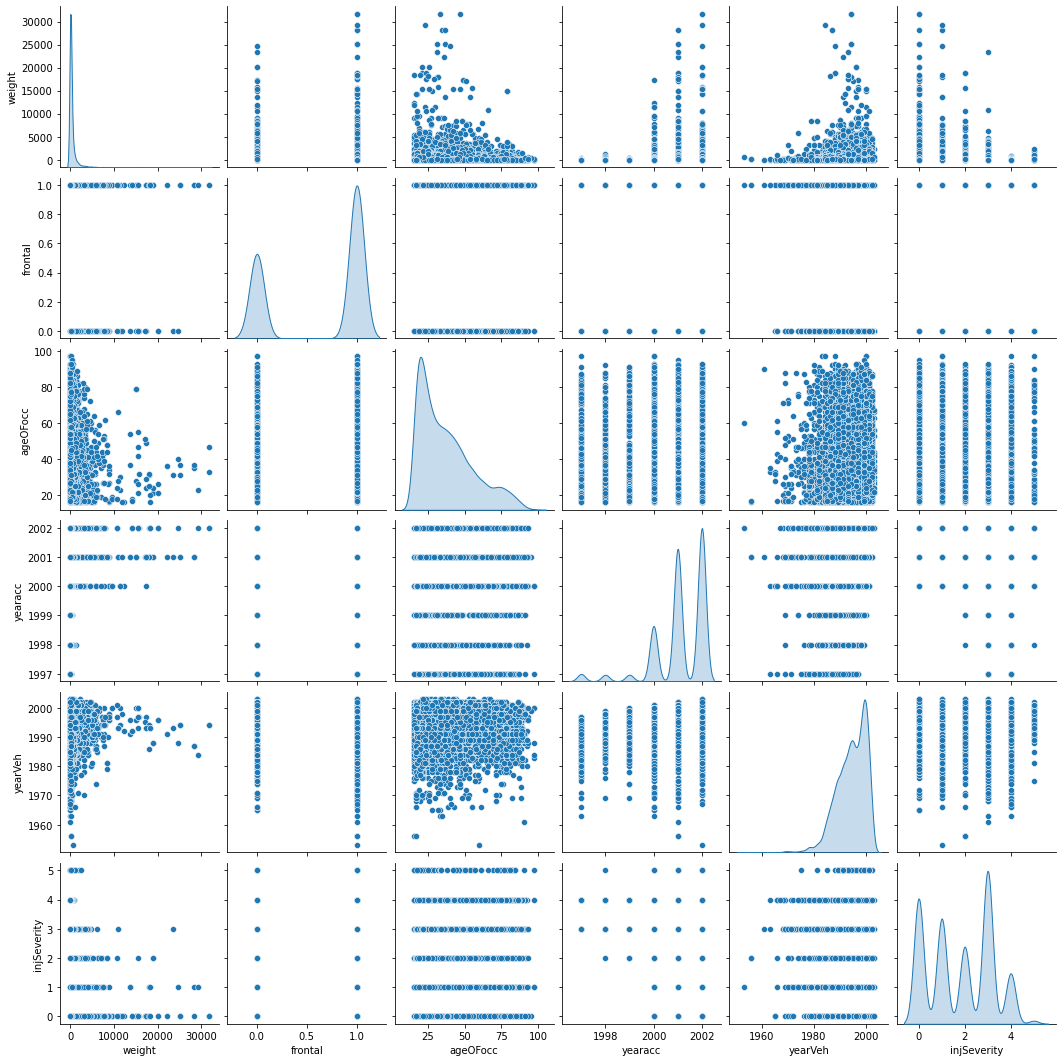

In [50]:
sns.pairplot(data = df, diag_kind='kde')  
plt.show()

### checking for Correlations

<AxesSubplot:>

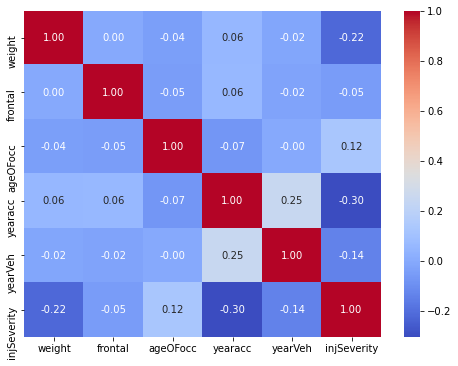

In [51]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [52]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
injSeverity,yearacc,0.303736


# 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis)

In [53]:
df['dvcat']=np.where(df['dvcat'] =='10-24', '5', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='25-39', '4', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='40-54', '3', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='55+', '2', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='1-9km/h', '1', df['dvcat'])

In [54]:
df['Survived']=np.where(df['Survived'] =='Not_Survived', '0', df['Survived'])
df['Survived']=np.where(df['Survived'] =='survived', '1', df['Survived'])

In [55]:
df['sex']=np.where(df['sex'] =='m', '1', df['sex'])
df['sex']=np.where(df['sex'] =='f', '0', df['sex'])

In [56]:
df['abcat']=np.where(df['abcat'] =='nodeploy', '0', df['abcat'])
df['abcat']=np.where(df['abcat'] =='unavail', '1', df['abcat'])
df['abcat']=np.where(df['abcat'] =='deploy', '2', df['abcat'])

In [57]:
df = pd.get_dummies(df, columns=['dvcat','abcat','sex','Survived','seatbelt','airbag','occRole','deploy'],drop_first=True)

In [58]:
df.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,injSeverity,dvcat_2,dvcat_3,dvcat_4,dvcat_5,abcat_1,abcat_2,sex_1,Survived_1,seatbelt_none,airbag_none,occRole_pass,deploy_1
0,27.078,1,32,1997,1987.0,4.0,1,0,0,0,1,0,1,0,1,1,0,0
1,89.627,0,54,1997,1994.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0
2,27.078,1,67,1997,1992.0,4.0,1,0,0,0,1,0,1,0,0,1,0,0
3,27.078,1,64,1997,1992.0,4.0,1,0,0,0,1,0,0,0,0,1,1,0
4,13.374,1,23,1997,1986.0,4.0,1,0,0,0,1,0,1,0,1,1,0,0


In [59]:
df2 = df.copy()

In [60]:
df.columns

Index(['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'injSeverity',
       'dvcat_2', 'dvcat_3', 'dvcat_4', 'dvcat_5', 'abcat_1', 'abcat_2',
       'sex_1', 'Survived_1', 'seatbelt_none', 'airbag_none', 'occRole_pass',
       'deploy_1'],
      dtype='object')

In [61]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in weight: 1413
No. of outliers in ageOFocc: 68
No. of outliers in yearacc: 622
No. of outliers in yearVeh: 147
No. of outliers in dvcat_2: 809
No. of outliers in dvcat_3: 1344
No. of outliers in Survived_1: 1180
No. of outliers in occRole_pass: 2431


No of attributes with outliers are : 8


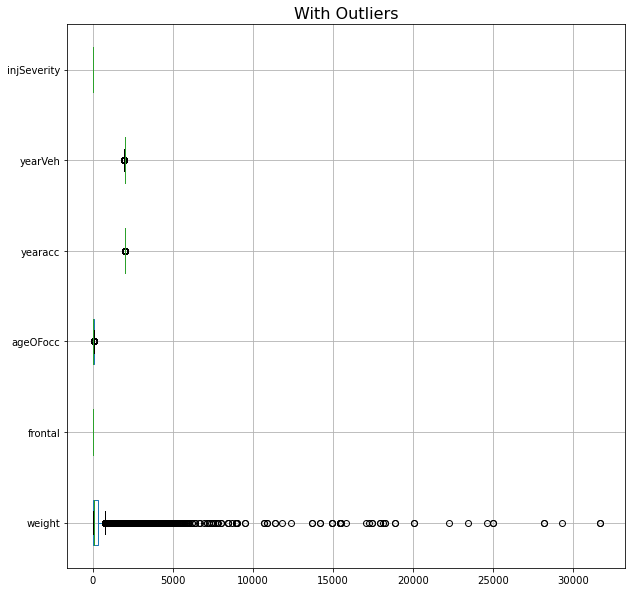

In [62]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [64]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

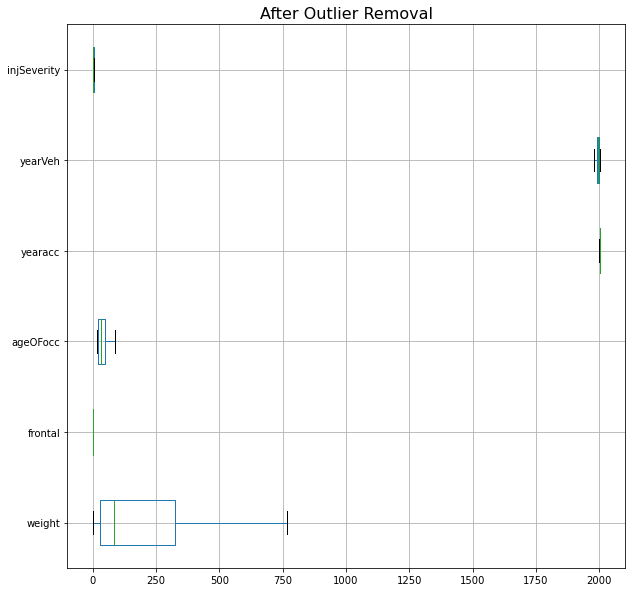

In [65]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [66]:
df.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,injSeverity,dvcat_2,dvcat_3,dvcat_4,dvcat_5,abcat_1,abcat_2,sex_1,Survived_1,seatbelt_none,airbag_none,occRole_pass,deploy_1
0,27.078,1.0,32.0,1999.5,1987.0,4.0,1,0,0,0,1,0,1,0,1,1,0,0
1,89.627,0.0,54.0,1999.5,1994.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0
2,27.078,1.0,67.0,1999.5,1992.0,4.0,1,0,0,0,1,0,1,0,0,1,0,0
3,27.078,1.0,64.0,1999.5,1992.0,4.0,1,0,0,0,1,0,0,0,0,1,1,0
4,13.374,1.0,23.0,1999.5,1986.0,4.0,1,0,0,0,1,0,1,0,1,1,0,0


In [67]:
data = df.copy()

In [68]:
# Copy all the predictor variables into X dataframe
x = df.drop('Survived_1', axis=1)

# Copy target into the y dataframe. 
y = df[['Survived_1']]

In [69]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=df['Survived_1'])

In [70]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7849, 17)
Number of rows and columns of the training set for the dependent variable: (7849, 1)
Number of rows and columns of the test set for the independent variables: (3364, 17)
Number of rows and columns of the test set for the dependent variable: (3364, 1)


In [71]:
y_train.value_counts()

Survived_1
1             7023
0              826
dtype: int64

In [72]:
y_test.value_counts()

Survived_1
1             3010
0              354
dtype: int64

In [73]:
from scipy.stats import zscore

In [74]:
x[['weight', 'frontal', 'ageOFocc', 'yearacc','yearVeh', 'injSeverity',
       'dvcat_2', 'dvcat_3','dvcat_4', 'dvcat_5', 'abcat_1', 'abcat_2',
       'sex_1','seatbelt_none', 'airbag_none', 'occRole_pass',
       'deploy_1']]=x[['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'injSeverity',
       'dvcat_2', 'dvcat_3', 'dvcat_4', 'dvcat_5', 'abcat_1', 'abcat_2',
       'sex_1','seatbelt_none', 'airbag_none', 'occRole_pass',
       'deploy_1']].apply(zscore)

In [75]:
x.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,injSeverity,dvcat_2,dvcat_3,dvcat_4,dvcat_5,abcat_1,abcat_2,sex_1,seatbelt_none,airbag_none,occRole_pass,deploy_1
0,-0.734649,0.743382,-0.298637,-2.067313,-1.340575,1.585012,3.586129,-0.369031,-0.654946,-0.96589,1.303831,-0.798082,0.924454,1.526196,1.303831,-0.526133,-0.798082
1,-0.495846,-1.345203,0.914509,-2.067313,-0.045346,1.585012,-0.278852,-0.369031,1.526844,-0.96589,-0.766970,-0.798082,-1.081720,-0.655224,-0.766970,-0.526133,-0.798082
2,-0.734649,0.743382,1.631367,-2.067313,-0.415412,1.585012,3.586129,-0.369031,-0.654946,-0.96589,1.303831,-0.798082,0.924454,-0.655224,1.303831,-0.526133,-0.798082
3,-0.734649,0.743382,1.465938,-2.067313,-0.415412,1.585012,3.586129,-0.369031,-0.654946,-0.96589,1.303831,-0.798082,-1.081720,-0.655224,1.303831,1.900659,-0.798082
4,-0.786969,0.743382,-0.794923,-2.067313,-1.525607,1.585012,3.586129,-0.369031,-0.654946,-0.96589,1.303831,-0.798082,0.924454,1.526196,1.303831,-0.526133,-0.798082


## Fit the Logistic Regression model

In [76]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [77]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9811440947891451
0.9824613555291319


## Build LDA Model

In [78]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)

In [79]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.9545164989170595
0.9545184304399524


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Applying GridSearchCV for Logistic Regression

In [80]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [81]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [82]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [84]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear')


In [85]:
best_model = grid_search.best_estimator_

In [86]:
best_model

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear')

### Predicting on Training and Test dataset

In [87]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [88]:
ytrain_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Getting the Predicted Classes and Probs

In [89]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,3.672935e-09,1.000000
1,6.234394e-06,0.999994
2,7.781591e-06,0.999992
3,4.451725e-05,0.999955
4,7.684450e-04,0.999232


### Confusion Matrix for the training data

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       826
           1       0.99      0.99      0.99      7023

    accuracy                           0.98      7849
   macro avg       0.96      0.94      0.95      7849
weighted avg       0.98      0.98      0.98      7849
 



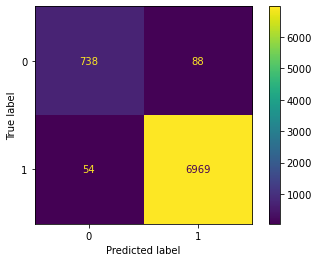

In [90]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

### Confusion Matrix for the test data

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       354
           1       0.99      0.99      0.99      3010

    accuracy                           0.98      3364
   macro avg       0.96      0.94      0.95      3364
weighted avg       0.98      0.98      0.98      3364
 



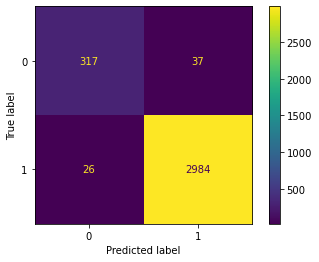

In [91]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Model Evaluation

In [92]:
lr_train_acc = best_model.score(X_train,y_train)
lr_train_acc

0.9819085233787743

In [93]:
# Accuracy - Training Data
lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.9812722948870393

### AUC and ROC for the training data

AUC: 0.987


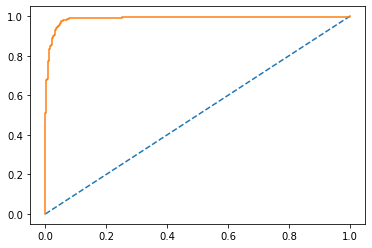

In [94]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.987


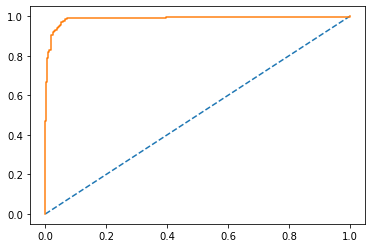

In [95]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [96]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.99
lr_train_recall  0.99
lr_train_f1  0.99


In [97]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.99
lr_test_recall  0.99
lr_test_f1  0.99


## LDA MODEL

### Applying GridSearchCV for LDA

In [98]:
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

print(gsLDA.best_params_)
print(gsLDA.best_score_)
print(gsLDA.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'solver': 'svd', 'tol': 0.0001}
0.953625536201742
{'solver': 'svd', 'tol': 0.0001}


In [99]:
best_lda = gsLDA.best_estimator_
best_lda

LinearDiscriminantAnalysis()

### Prediction

In [100]:
# Prediction on the training set
ytrain_predict = best_lda.predict(X_train)
ytest_predict = best_lda.predict(X_test)

In [101]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_lda.predict(X_train)
#Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = best_lda.predict(X_test)

In [102]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_lda.predict(X_train)
#Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = best_lda.predict(X_test)

In [103]:
pred_class_test

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [104]:
pred_class_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [105]:
## Getting the probabilities on the test set
ytest_predict_prob=best_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.000794,0.999206
1,0.008386,0.991614
2,0.001334,0.998666
3,0.000477,0.999523
4,0.023962,0.976038


In [106]:
## Getting the probabilities on the test set
ytrain_predict_prob=best_lda.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.003305,0.996695
1,0.087743,0.912257
2,0.000227,0.999773
3,0.058500,0.941500
4,0.000142,0.999858


In [107]:
# Training Data Probability Prediction
pred_prob_train = best_lda.predict_proba(X_train)
#Test Data Probability Prediction
pred_prob_test = best_lda.predict_proba(X_test)

## Confusion matrix on the training data

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       826
           1       0.97      0.98      0.97      7023

    accuracy                           0.95      7849
   macro avg       0.88      0.87      0.88      7849
weighted avg       0.95      0.95      0.95      7849
 



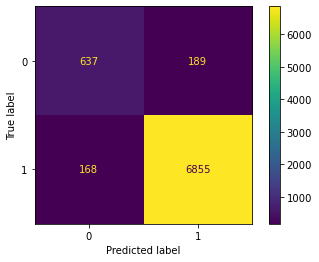

In [108]:
## Confusion matrix on the training data
plot_confusion_matrix(best_lda,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

### Confusion Matrix for the test data

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       354
           1       0.97      0.98      0.97      3010

    accuracy                           0.95      3364
   macro avg       0.88      0.88      0.88      3364
weighted avg       0.95      0.95      0.95      3364
 



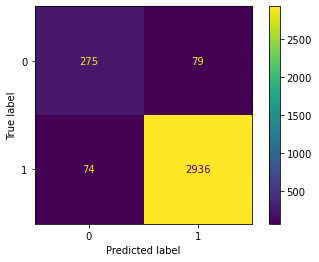

In [109]:
## Confusion matrix on the test data
plot_confusion_matrix(best_lda,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

## Model Evaluation

In [110]:
lda_train_acc = best_lda.score(X_train,y_train)
lda_train_acc

0.9545164989170595

In [111]:
lda_test_acc = best_lda.score(X_test,y_test)
lda_test_acc

0.9545184304399524

### AUC and ROC for the training data

AUC: 0.971


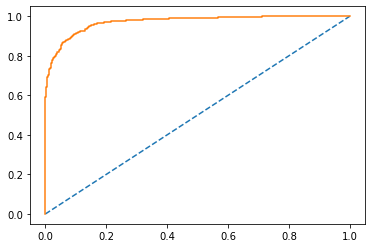

In [112]:
# predict probabilities
probs = best_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.970


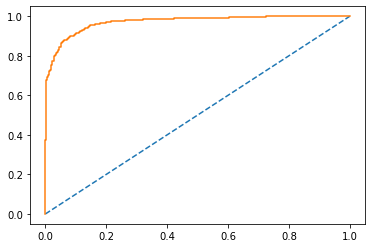

In [113]:
# predict probabilities
probs = best_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [114]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.97
lda_train_recall  0.98
lda_train_f1  0.97


In [115]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.97
lda_test_recall  0.98
lda_test_f1  0.97


## changing the cut-off values for maximum accuracy

0.1 

Accuracy Score 0.9335
F1 Score 0.964 

Confusion Matrix


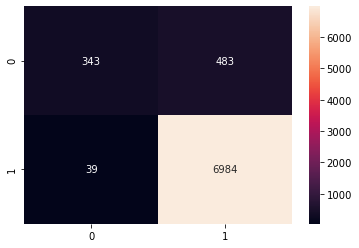

0.2 

Accuracy Score 0.9439
F1 Score 0.9694 

Confusion Matrix


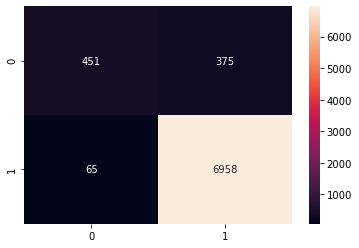

0.3 

Accuracy Score 0.9506
F1 Score 0.9727 

Confusion Matrix


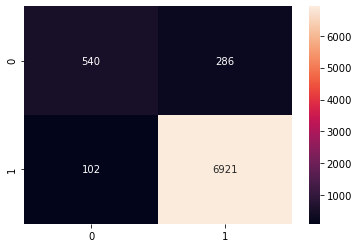

0.4 

Accuracy Score 0.9525
F1 Score 0.9736 

Confusion Matrix


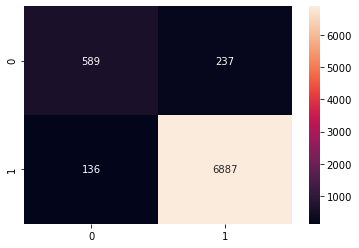

0.5 

Accuracy Score 0.9545
F1 Score 0.9746 

Confusion Matrix


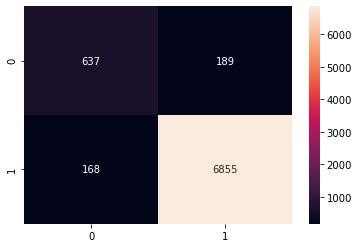

0.6 

Accuracy Score 0.9512
F1 Score 0.9726 

Confusion Matrix


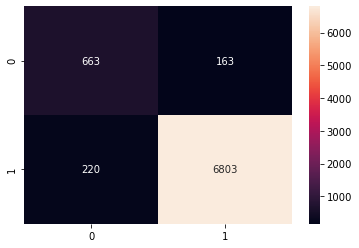

0.7 

Accuracy Score 0.9471
F1 Score 0.9701 

Confusion Matrix


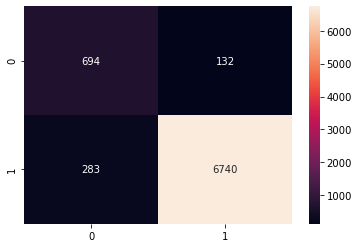

0.8 

Accuracy Score 0.9315
F1 Score 0.9608 

Confusion Matrix


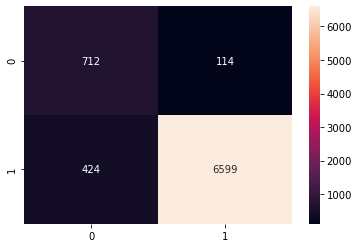

0.9 

Accuracy Score 0.9048
F1 Score 0.9445 

Confusion Matrix


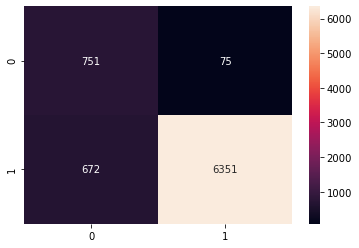

In [160]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

### We see that 0.5 and 0.6 gives better accuracy than the rest of the custom cut-off values. But 0.4 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.2 to get the optimum 'f1' score.

### Probability prediction for the training and test data

AUC for the Training Data: 0.971
AUC for the Test Data: 0.970


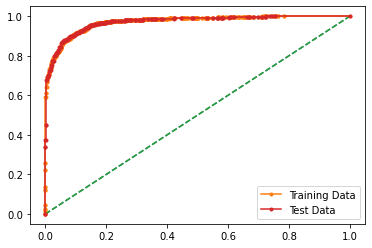

In [161]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [162]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

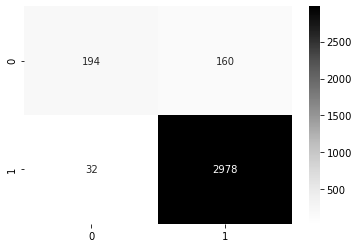

In [163]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [164]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.79      0.78      0.78       354
           1       0.97      0.98      0.97      3010

    accuracy                           0.95      3364
   macro avg       0.88      0.88      0.88      3364
weighted avg       0.95      0.95      0.95      3364
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.86      0.55      0.67       354
           1       0.95      0.99      0.97      3010

    accuracy                           0.94      3364
   macro avg       0.90      0.77      0.82      3364
weighted avg       0.94      0.94      0.94      3364
 



In [174]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.98,0.98,0.95,0.95
AUC,0.99,0.99,0.97,0.97
Recall,0.99,0.99,0.98,0.98
Precision,0.99,0.99,0.97,0.97
F1 Score,0.99,0.99,0.97,0.97
